# STA130 Week 02 Homework (Prelecture)

## Question 1

Link to Conversation with ChatGPT:

https://chatgpt.com/share/66f68b0d-5220-800d-a963-91e88f9dcc87

(I had to tell ChatGPT to not generate an image because it would keep on misinterpreting me and start generating an image based on what I said...)

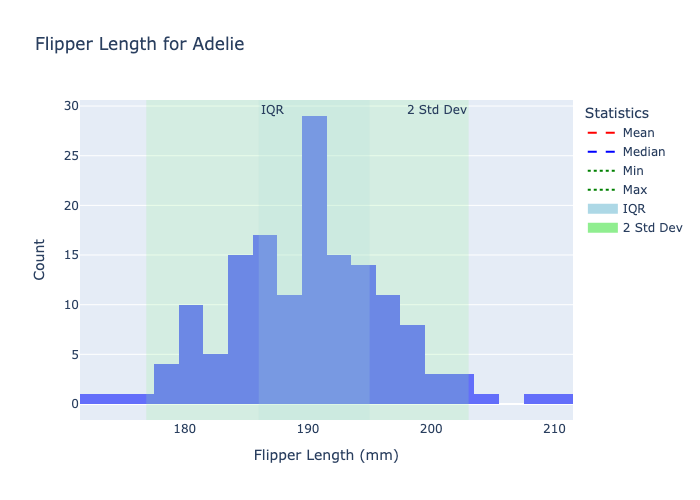

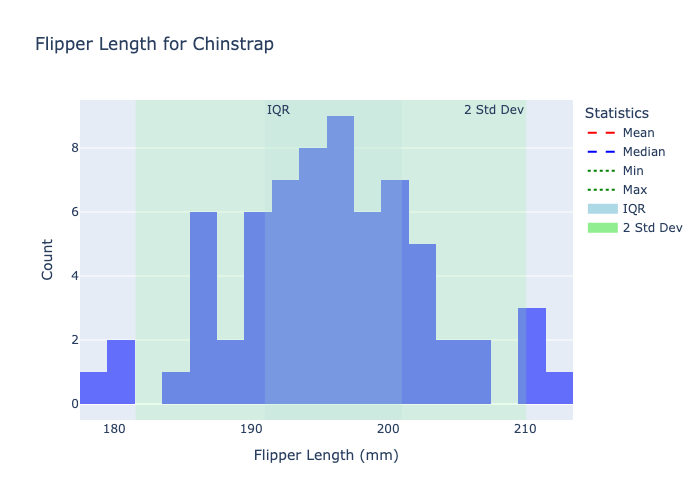

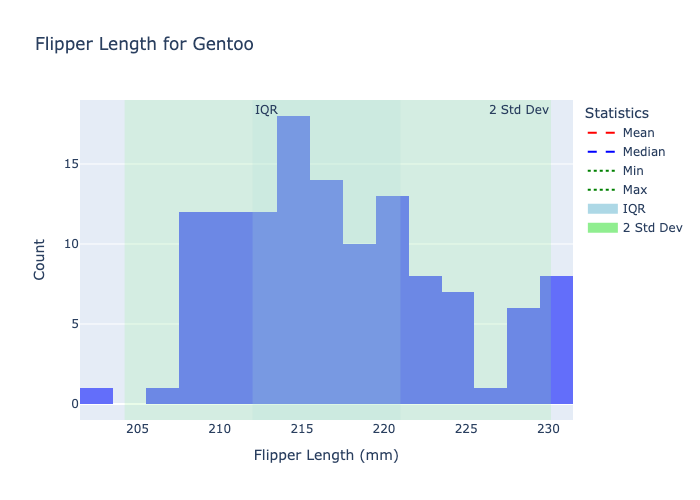

In [433]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

# Drop rows with missing values in 'species' and 'flipper_length_mm'
penguins = penguins.dropna(subset=['species', 'flipper_length_mm'])

# Function to create a plotly histogram with mean, median, range, IQR, and standard deviation markers
def plot_histogram_with_statistics(species_data, species_name):
    # Calculate statistics
    mean_fl = species_data['flipper_length_mm'].mean()
    median_fl = species_data['flipper_length_mm'].median()
    std_fl = species_data['flipper_length_mm'].std()
    min_fl = species_data['flipper_length_mm'].min()
    max_fl = species_data['flipper_length_mm'].max()
    iqr_fl = np.percentile(species_data['flipper_length_mm'], 75) - np.percentile(species_data['flipper_length_mm'], 25)
    lower_bound = mean_fl - 2 * std_fl
    upper_bound = mean_fl + 2 * std_fl

    # Create the histogram
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=20, title=f'Flipper Length for {species_name}')
    
    # Add mean line
    fig.add_trace(go.Scatter(x=[mean_fl], y=[0], mode='lines', line=dict(color='red', dash='dash'),
                             name='Mean', hoverinfo='skip'))

    # Add median line
    fig.add_trace(go.Scatter(x=[median_fl], y=[0], mode='lines', line=dict(color='blue', dash='dash'),
                             name='Median', hoverinfo='skip'))

    # Add range lines (min and max)
    fig.add_trace(go.Scatter(x=[min_fl], y=[0], mode='lines', line=dict(color='green', dash='dot'),
                             name='Min', hoverinfo='skip'))
    fig.add_trace(go.Scatter(x=[max_fl], y=[0], mode='lines', line=dict(color='green', dash='dot'),
                             name='Max', hoverinfo='skip'))

    # Add interquartile range (IQR) rectangle
    fig.add_vrect(x0=np.percentile(species_data['flipper_length_mm'], 25), x1=np.percentile(species_data['flipper_length_mm'], 75),
                  fillcolor="lightblue", opacity=0.2, line_width=0, annotation_text="IQR", annotation_position="top left",
                  name='IQR')
    
    # Add two standard deviation range
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="lightgreen", opacity=0.2, line_width=0, 
                  annotation_text="2 Std Dev", annotation_position="top right", name='2 Std Dev')

    # Create invisible traces to add IQR and Std Dev to the legend
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='lightblue', width=10),
                             name='IQR'))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='lightgreen', width=10),
                             name='2 Std Dev'))

    # Update layout to include legend
    fig.update_layout(
        xaxis_title='Flipper Length (mm)',
        yaxis_title='Count',
        legend_title_text='Statistics'
    )

    return fig

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    fig = plot_histogram_with_statistics(species_data, species)
    fig.show(renderer='png')

## Question 2

Code Generated with Conversations with ChatGPT

https://chatgpt.com/share/66f67da9-b754-800d-a79a-d0af47c944f2

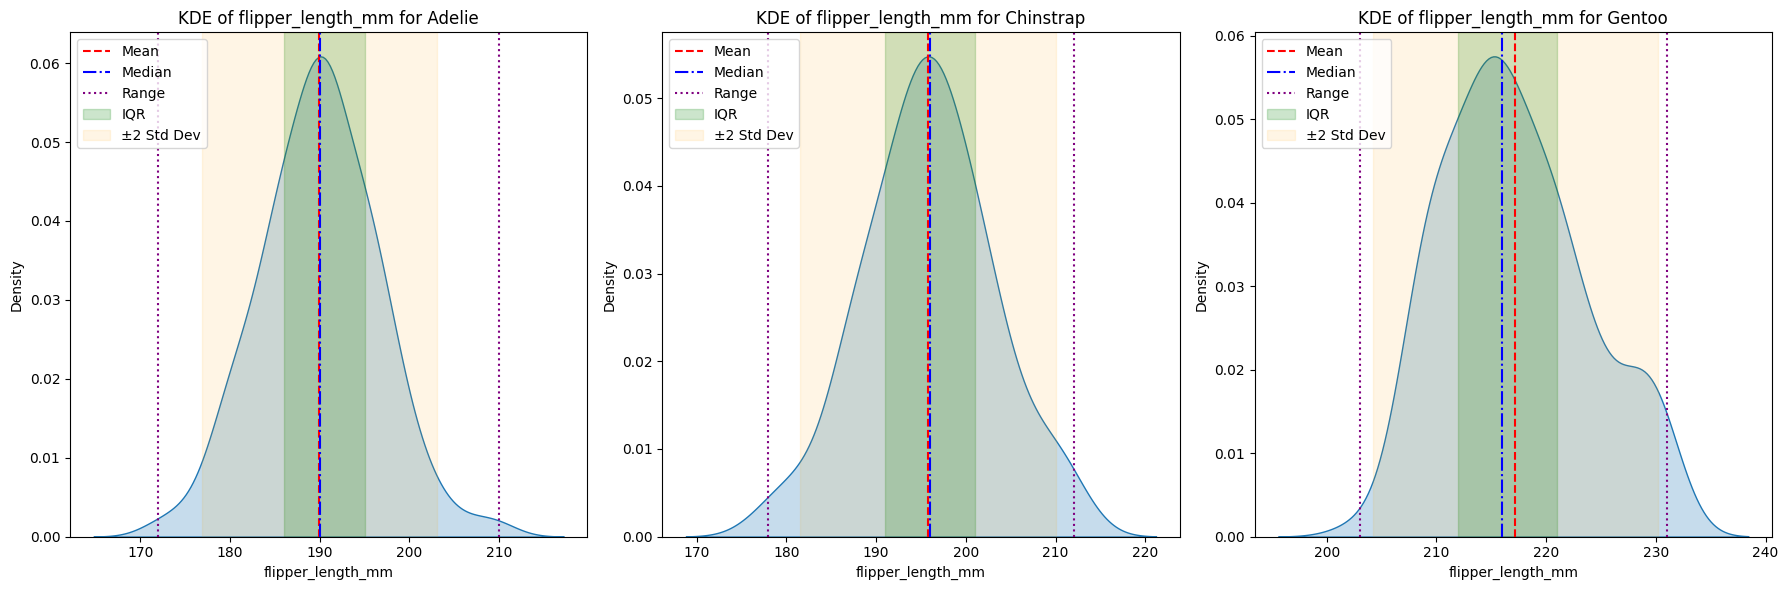

In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the species and the variable for KDE plot (e.g., flipper_length_mm)
species = penguins['species'].unique()
variable = 'flipper_length_mm'

# Colors for the different statistics
mean_color = 'red'
median_color = 'blue'
range_color = 'purple'
iqr_color = 'green'
std_color = 'orange'

# Plot KDE for each species
for i, sp in enumerate(species):
    # Filter data for the species
    data = penguins[penguins['species'] == sp][variable].dropna()
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    std = data.std()
    min_val, max_val = data.min(), data.max()
    q1, q3 = data.quantile(0.25), data.quantile(0.75)
    iqr = q3 - q1
    two_std_range = (mean - 2 * std, mean + 2 * std)

    # Plot KDE
    sns.kdeplot(x=data, ax=axes[i], fill=True)
    axes[i].set_title(f"KDE of {variable} for {sp}")

    # Plot mean
    axes[i].axvline(mean, color=mean_color, linestyle='--', label='Mean')
    
    # Plot median
    axes[i].axvline(median, color=median_color, linestyle='-.', label='Median')
    
    # Plot range
    axes[i].axvline(min_val, color=range_color, linestyle=':', label='Range')
    axes[i].axvline(max_val, color=range_color, linestyle=':')

    # Plot interquartile range (IQR)
    axes[i].axvspan(q1, q3, color=iqr_color, alpha=0.2, label='IQR')

    # Plot two standard deviations from the mean
    axes[i].axvspan(two_std_range[0], two_std_range[1], color=std_color, alpha=0.1, label='±2 Std Dev')

    # Add a legend to each plot
    axes[i].legend(loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Gotta say that looks very cool

During my conversation with ChatGPT, the first full version of the code Chat generated caused an error, I sent the error back to ChatGPT and it gave me another version which worked, which is the version in the notebook now.

## Question 3

Link to Conversation with ChatGPT: 

https://chatgpt.com/share/66f68bb8-82b0-800d-9bc8-43c6960db494

<br>

After the conversation with ChatGPT I think that the Kernel Density Estimator is probably the most useful, as it fulfills if not all but most of how histograms are used, and can even make estimations based on the distribution. 

But which one to use would probably still depends on the use case:

### Box Plot

For a box plot, it is mainly useful for getting those key summaries and info about the data, such as the median, upper and lower percentiles, and outliers. It is also compact and simple on the eye.

However, box plots aren't that useful anymore to look at the exact shape or distribution of the data, such as slight skews, or bimodal/multimodal distributions.

### Histogram

Histograms do a much better job and are mainly useful at visualizing the shape of the distribution, making it easier to identify skewness, modality, while also being able to identify outliers or gaps in the data.

However, histograms might not be very useful when comparing many distributions, due to overlapping bars, bin choices, color overloading (as demonstrated in one of the plots in question 7) (yes I did question 7 before this question), and issues with scales. Data density in histograms are also not represented smoothly, and choosing the wrong bin widths could cause difficult analysis or obscure important information.

### KDE

KDEs are very advanced form of visualizing distributions, it smoothes out data, which is very different from histograms, to show a continuous estimation of the distribution, and does not rely on choosing good bin widths for effective analysis.

However, KDEs could be much more computationally intensive compared to box plots and histograms, and, like how histograms depend on good bin widths, KDEs depend on good bandwidth choices for effective analysis.

KDEs overall can be very useful for estimating values in a distribution that aren't represented in the original data. KDEs can also be more useful for visualizing nuanced patterns, such as modality, which sometimes might not be as clear on histograms.

## Question 4

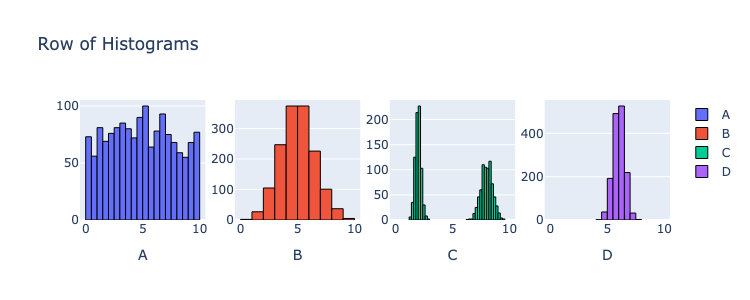

In [435]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 4.1

Dataset A and C probably have similar means and similar variances. 

Although I can't be entirely sure, I think both A and C have a mean at around 5, and dataset A is very spread out meaning a high variance and C being bimodal also leading to high variance.

### 4.2

Dataset B and dataset D probably have similar menas but quite different variances.

Since dataset B and D both have a central point at around 5, but dataset B is a lot more spread out compared to dataset D.

### 4.3

I don't think any of the datasets would have similar variances but different means, the only two datasets that have a similar variance would be A and C, but as previously mentioned these also probably have a similar mean. If I were wrong about the mean, A and C would probbaly be my best guess.

### 4.4

I think dataset C and D probably have the most different variances and means.

Since I believe that the mean of C is more to the left and D is more to the right, these would have a relatively big difference in mean, they would also have a big different in variance as the bimodal distribution in C leads to a high variance whereas dataset D has a very low variance, mostly being concentrated in a small area.

## Question 5

Link to conversation with ChatGPT (Just in case you didn't realize, yes, I decided that it was not a great idea to paste the entire chat log into the notebook which is what I was previously doing, plz do tell me which one you'd prefer tho):

https://chatgpt.com/share/66f67fe2-7010-800d-941f-4fb9eff90794

<br>

Skewness is one of the ways we can describe the shape of a distribution, or more specifically, the asymmetry of a distribution. It can describe whether the data are more concentrated (or spread out) on one side or another.

For example, if a distribution is skewed left, it means that the data is more spread out on the left side, or being more concentrated on the right side. And vice verse for being skewed right. Being skewed left is also being negatively skewed, and skewed right is also being positively skewed.

Now, how does mean and median relate to skewness? Mean and median are two ways to describe the central tendency of a distribution, where mean describes the average value of all the data points, and median describe the "middle value" of all the data points. We can describe the relationship between these and skewness in different cases:

**When the distribution is symmetric**, meaning that there is zero skewness, the median is equal to the mean, since the data points are equally balanced on both sides, making median and mean equal each other.

**When the distribution is skewed right**, the mean would become larger than the median, this is because the more spread out distribution of on the right side of the distribution affects the mean due to extreme values, increasing the mean, causing the mean to be large than the median.

**When the distribution is skewed left**, the mean would become smaller than the median, caused also by extreme values on the left side of the distribution.

<br>

The code shown can be used as an example to desmonstrate the relationship between mean, median and left and right skewness. I will be breaking the code into a sequence of code blocks and adding comments to show what they do.

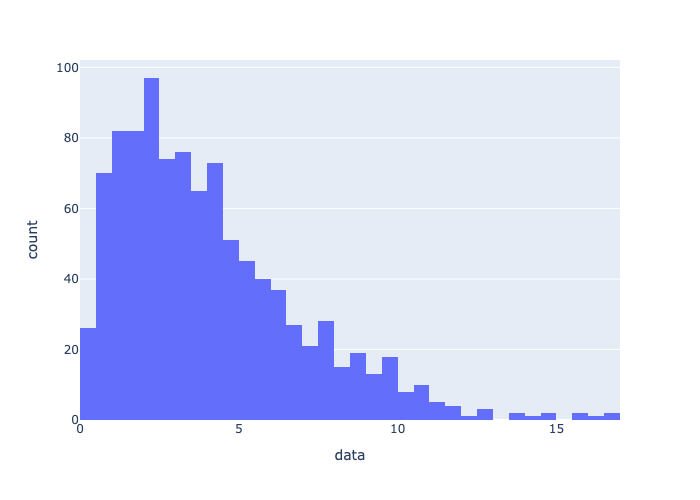

In [436]:
# import libraries
from scipy import stats
import pandas as pd
import numpy as np

# generates a gamma distribution with shape and scale parameters at 2
# the stats.gamma function is part of the scipy library, and
# it generates random numbers from a gamma distribution, the gamma distribution
# is typically right-skewed

# .rvs() generates random numbers from the distribution, size=1000
# generates 1000 random numbers from the gamma distribution
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)

# plots the histogram of the generated data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

In [437]:
# As you can see, the distribution is skewed right
# (more spread out on the right side)

# Now lets get the mean of the generated distribution
sample1.mean()

np.float64(4.109730942370025)

In [438]:
# median
np.quantile(sample1, [0.5])

array([3.44814739])

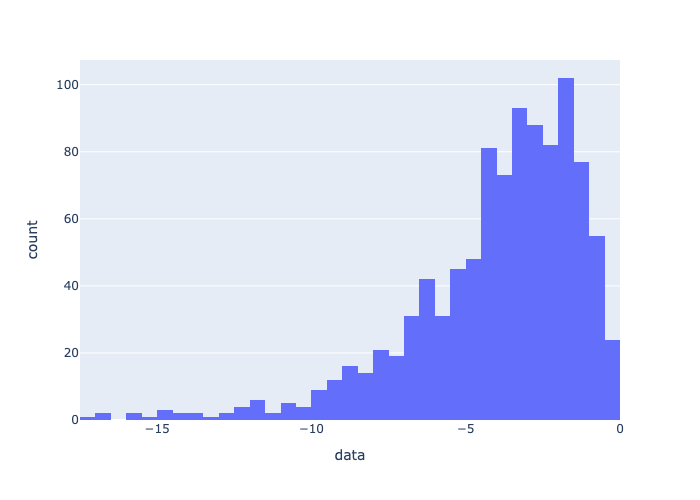

In [439]:
# The mean has a value of 4.115067, and the median has a value of 3.44179
# The mean is greater than the median, which is expected for right-skewed distributions

# Now lets try to generate a distribution that is left skewed
# We can do this by negating the generated data, with a '-' sign
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

In [440]:
# Yep, the distribution is left-skewed

# now lets get the mean again
sample2.mean()

np.float64(-4.007142780100608)

In [441]:
# median
np.quantile(sample2, [0.5])

array([-3.38668787])

As expected, the mean is less than the median, which is typical for left-skewed distributions

## Question 6

I personally enjoying using the flatform "Kaggle" (https://www.kaggle.com/datasets) to look for datasets. So I browsed around and found this dataset about games that are on the game journalism site IGN.

In [442]:
import pandas as pd

import plotly.offline as pyo
pyo.init_notebook_mode()

import plotly.express as px

# loading in the dataset (uploaded onto my github sta130 repo)
df = pd.read_csv("https://raw.githubusercontent.com/HDEnt327/sta130/refs/heads/main/HW/DATASETS/ign.csv")
df

Unnamed: 0 score_phrase  \
0               0      Amazing   
1               1      Amazing   
2               2        Great   
3               3        Great   
4               4        Great   
...           ...          ...   
18620       18620         Good   
18621       18621      Amazing   
18622       18622     Mediocre   
18623       18623  Masterpiece   
18624       18624  Masterpiece   

                                                   title  \
0                                LittleBigPlanet PS Vita   
1      LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2                                   Splice: Tree of Life   
3                                                 NHL 13   
4                                                 NHL 13   
...                                                  ...   
18620                          Tokyo Mirage Sessions #FE   
18621                  LEGO Star Wars: The Force Awakens   
18622            Star Ocean: Integrity and Faithlessness   
18623                                             Inside   
18624                                             Inside   

                                                     url          platform  \
0                 /games/littlebigplanet-vita/vita-98907  PlayStation Vita   
1      /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita   
2                              /games/splice/ipad-141070              iPad   
3                          /games/nhl-13/xbox-360-128182          Xbox 360   
4                               /games/nhl-13/ps3-128181     PlayStation 3   
...                                                  ...               ...   
18620  /games/fire-emblem-x-shin-megami-tensei/wii-u-...             Wii U   
18621  /games/lego-star-wars-the-force-awakens/ps4-20...     PlayStation 4   
18622                   /games/star-ocean-5/ps4-20035681     PlayStation 4   
18623             /games/inside-playdead/xbox-one-121435          Xbox One   
18624                 /games/inside-playdead/pc-20055740                PC   

       score              genre editors_choice  release_year  release_month  \
0        9.0         Platformer              Y          2012              9   
1        9.0         Platformer              Y          2012              9   
2        8.5             Puzzle              N          2012              9   
3        8.5             Sports              N          2012              9   
4        8.5             Sports              N          2012              9   
...      ...                ...            ...           ...            ...   
18620    7.6                RPG              N          2016              6   
18621    9.0  Action, Adventure              Y          2016              6   
18622    5.8                RPG              N          2016              6   
18623   10.0          Adventure              Y          2016              6   
18624   10.0          Adventure              Y          2016              6   

       release_day  
0               12  
1               12  
2               12  
3               11  
4               11  
...            ...  
18620           29  
18621           29  
18622           28  
18623           28  
18624           28  

[18625 rows x 11 columns]

Hmm, interesting, the dataset includes quite a lot of both numerical and non-numerical data. I think we could use the non-numerical data to do some sort of categorical analysis to look for interesting aspects. I'm going to want to focus my analysis on the score, or the rating of the game. But before I proceed, I'm going to check the usability of the dataset by checking for null values and cleaning up the data.

In [443]:
df.isna().sum()

Unnamed: 0         0
score_phrase       0
title              0
url                0
platform           0
score              0
genre             36
editors_choice     0
release_year       0
release_month      0
release_day        0
dtype: int64

In [444]:
# The genre column has 36 missing values, so we will drop those rows
df = df.dropna(subset=["genre"])

Now that I have cleaned up the data, I want to take a look at some basic info about the dataset. I will make a histogram to look at frequency information. For the histogram, I will add color sorting based on the genre of the game.

In [445]:
df.describe()

Unnamed: 0         score  release_year  release_month   release_day
count  18589.000000  18589.000000  18589.000000   18589.000000  18589.000000
mean    9306.310183      6.950853   2006.508634       7.139868     15.601431
std     5376.141895      1.712078      4.588687       3.477048      8.692460
min        0.000000      0.500000   1970.000000       1.000000      1.000000
25%     4651.000000      6.000000   2003.000000       4.000000      8.000000
50%     9298.000000      7.300000   2007.000000       8.000000     16.000000
75%    13959.000000      8.200000   2010.000000      10.000000     23.000000
max    18624.000000     10.000000   2016.000000      12.000000     31.000000

Once again noting that I am mainly focusing on data in the "score" column. 

From the information describe() gives me I can see that the games on IGN has a mean rating of 6.9 and a median rating of 7.3. 

It is interesting to note that the 25% percentile rating is a 6, which is in the upper half in the 0-10 rating range for games on IGN. From this info we can infer that games are very rarely rated very low scores on IGN.

In [446]:
df.shape

(18589, 11)

The dataset lists 18589 games listed and reviewed on IGN.

In [447]:
df.nunique()

Unnamed: 0        18589
score_phrase         11
title             12556
url               18541
platform             59
score                93
genre               112
editors_choice        2
release_year         22
release_month        12
release_day          31
dtype: int64

This is weird, nunique() should report how many different unique values there are for a column, but there are 18589 rows in the dataset, but only 12556 unique values for titles. Hmmm... Let me try something...

In [448]:
# https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
df[df.duplicated(['title'], keep=False)]

Unnamed: 0 score_phrase                      title  \
3               3        Great                     NHL 13   
4               4        Great                     NHL 13   
5               5         Good  Total War Battles: Shogun   
6               6        Awful        Double Dragon: Neon   
8               8        Awful        Double Dragon: Neon   
...           ...          ...                        ...   
18607       18607         Good                 Pokemon Go   
18614       18614      Amazing          Zero Time Dilemma   
18615       18615      Amazing          Zero Time Dilemma   
18623       18623  Masterpiece                     Inside   
18624       18624  Masterpiece                     Inside   

                                              url          platform  score  \
3                   /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                        /games/nhl-13/ps3-128181     PlayStation 3    8.5   
5      /games/total-war-battles-shogun/mac-142565         Macintosh    7.0   
6       /games/double-dragon-neon/xbox-360-131320          Xbox 360    3.0   
8            /games/double-dragon-neon/ps3-131321     PlayStation 3    3.0   
...                                           ...               ...    ...   
18607           /games/pokemon-go/iphone-20042699            iPhone    7.0   
18614         /games/zero-time-dilemma/3ds-163737      Nintendo 3DS    9.2   
18615      /games/zero-time-dilemma/vita-20039757  PlayStation Vita    9.2   
18623      /games/inside-playdead/xbox-one-121435          Xbox One   10.0   
18624          /games/inside-playdead/pc-20055740                PC   10.0   

           genre editors_choice  release_year  release_month  release_day  
3         Sports              N          2012              9           11  
4         Sports              N          2012              9           11  
5       Strategy              N          2012              9           11  
6       Fighting              N          2012              9           11  
8       Fighting              N          2012              9           11  
...          ...            ...           ...            ...          ...  
18607     Battle              N          2016              7           13  
18614  Adventure              Y          2016              6           29  
18615  Adventure              Y          2016              6           29  
18623  Adventure              Y          2016              6           28  
18624  Adventure              Y          2016              6           28  

[9366 rows x 11 columns]

Ah! There we go, so some games are published on multiple platforms (PC, Xbox, Playstation, etc.) and each different published platform has a new entry in the dataset. From my observations, it seems that the score for the game doesn't change the rating. This could be problematic, as the same game would have two of the same ratings. I will remove the duplicates.

In [449]:
df = df.drop_duplicates(subset=["title"]).reset_index(drop=True)
df = df.drop(columns=["Unnamed: 0"])
df

score_phrase                                              title  \
0          Amazing                            LittleBigPlanet PS Vita   
1          Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2            Great                               Splice: Tree of Life   
3            Great                                             NHL 13   
4             Good                          Total War Battles: Shogun   
...            ...                                                ...   
12551      Amazing                                          Starbound   
12552         Good                                    Human Fall Flat   
12553         Good                          Tokyo Mirage Sessions #FE   
12554      Amazing                  LEGO Star Wars: The Force Awakens   
12555     Mediocre            Star Ocean: Integrity and Faithlessness   

                                                     url          platform  \
0                 /games/littlebigplanet-vita/vita-98907  PlayStation Vita   
1      /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita   
2                              /games/splice/ipad-141070              iPad   
3                          /games/nhl-13/xbox-360-128182          Xbox 360   
4             /games/total-war-battles-shogun/mac-142565         Macintosh   
...                                                  ...               ...   
12551                    /games/starbound-2016/pc-128879                PC   
12552                 /games/human-fall-flat/pc-20051928                PC   
12553  /games/fire-emblem-x-shin-megami-tensei/wii-u-...             Wii U   
12554  /games/lego-star-wars-the-force-awakens/ps4-20...     PlayStation 4   
12555                   /games/star-ocean-5/ps4-20035681     PlayStation 4   

       score              genre editors_choice  release_year  release_month  \
0        9.0         Platformer              Y          2012              9   
1        9.0         Platformer              Y          2012              9   
2        8.5             Puzzle              N          2012              9   
3        8.5             Sports              N          2012              9   
4        7.0           Strategy              N          2012              9   
...      ...                ...            ...           ...            ...   
12551    9.1             Action              Y          2016              7   
12552    7.9     Puzzle, Action              N          2016              7   
12553    7.6                RPG              N          2016              6   
12554    9.0  Action, Adventure              Y          2016              6   
12555    5.8                RPG              N          2016              6   

       release_day  
0               12  
1               12  
2               12  
3               11  
4               11  
...            ...  
12551           28  
12552           28  
12553           29  
12554           29  
12555           28  

[12556 rows x 10 columns]

In [450]:
df.nunique()

score_phrase         11
title             12556
url               12556
platform             54
score                93
genre               109
editors_choice        2
release_year         22
release_month        12
release_day          31
dtype: int64

There we go!

Looking at the info nunique() gives, it seems that there are a total of 109 different genres of games listed in the dataset! Lets take a look at how the genres are distributed:

In [451]:
df.value_counts("genre")

genre
Action                   2458
Sports                   1077
Shooter                  1032
Strategy                  924
Adventure                 799
                         ... 
Adventure, Adult            1
Racing, Compilation         1
Music, RPG                  1
Shooter, Adventure          1
Adventure, Platformer       1
Name: count, Length: 109, dtype: int64

This isn't very useful, let me try something else

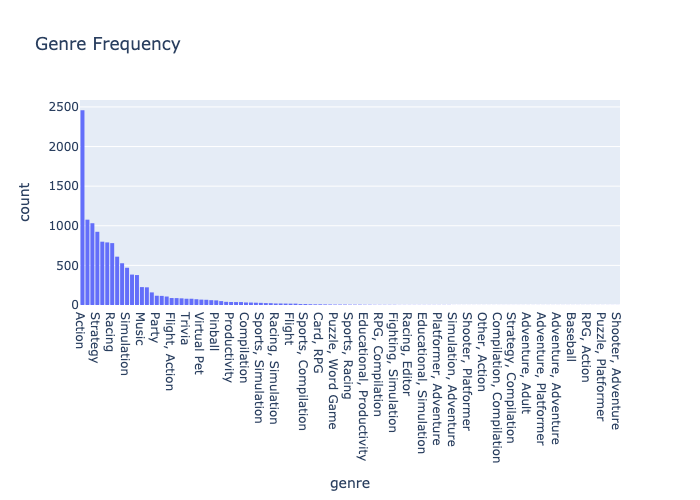

In [452]:
fig_genre = px.histogram(df, x="genre", title="Genre Frequency")

# https://www.geeksforgeeks.org/how-to-sort-plotly-bar-chart-in-descending-order/
fig_genre.update_layout(xaxis={'categoryorder': 'total descending'})
fig_genre.show(renderer="png")

Wow, that's quite interesting, it seems like action genre games almost dominate the total count of listed games on IGN. This may also signify that most games in the market are action games. The amount of action games is two times the amount of Adventure games, which is the 2nd most listed genre.

One thing I also notice is that lots of the less populated genres are actually combinations of two genres, I might find some way to deal with this later.

Another thing I want to do before moving on is making the date look better on the dataframe, right now the year, month and day of the release date are separated in different columns, I will combine them so it's easier to move on later.

In [453]:
# original code
# https://stackoverflow.com/questions/52358779/combining-year-month-day-columns-into-a-single-date-column-with-pandas

# code didn't work, so i asked chatgpt for help
# https://chatgpt.com/share/66f673cd-c710-800d-942c-9a556bde6b70

df['release_date'] = pd.to_datetime(df[['release_year', 'release_month', 'release_day']].rename(columns={
    'release_year': 'year',
    'release_month': 'month',
    'release_day': 'day'
}))

df = df.drop(columns=["release_year", "release_month", "release_day"])

df

score_phrase                                              title  \
0          Amazing                            LittleBigPlanet PS Vita   
1          Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2            Great                               Splice: Tree of Life   
3            Great                                             NHL 13   
4             Good                          Total War Battles: Shogun   
...            ...                                                ...   
12551      Amazing                                          Starbound   
12552         Good                                    Human Fall Flat   
12553         Good                          Tokyo Mirage Sessions #FE   
12554      Amazing                  LEGO Star Wars: The Force Awakens   
12555     Mediocre            Star Ocean: Integrity and Faithlessness   

                                                     url          platform  \
0                 /games/littlebigplanet-vita/vita-98907  PlayStation Vita   
1      /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita   
2                              /games/splice/ipad-141070              iPad   
3                          /games/nhl-13/xbox-360-128182          Xbox 360   
4             /games/total-war-battles-shogun/mac-142565         Macintosh   
...                                                  ...               ...   
12551                    /games/starbound-2016/pc-128879                PC   
12552                 /games/human-fall-flat/pc-20051928                PC   
12553  /games/fire-emblem-x-shin-megami-tensei/wii-u-...             Wii U   
12554  /games/lego-star-wars-the-force-awakens/ps4-20...     PlayStation 4   
12555                   /games/star-ocean-5/ps4-20035681     PlayStation 4   

       score              genre editors_choice release_date  
0        9.0         Platformer              Y   2012-09-12  
1        9.0         Platformer              Y   2012-09-12  
2        8.5             Puzzle              N   2012-09-12  
3        8.5             Sports              N   2012-09-11  
4        7.0           Strategy              N   2012-09-11  
...      ...                ...            ...          ...  
12551    9.1             Action              Y   2016-07-28  
12552    7.9     Puzzle, Action              N   2016-07-28  
12553    7.6                RPG              N   2016-06-29  
12554    9.0  Action, Adventure              Y   2016-06-29  
12555    5.8                RPG              N   2016-06-28  

[12556 rows x 8 columns]

Great! Now let's show a basic histogram, color grouped based on genres.

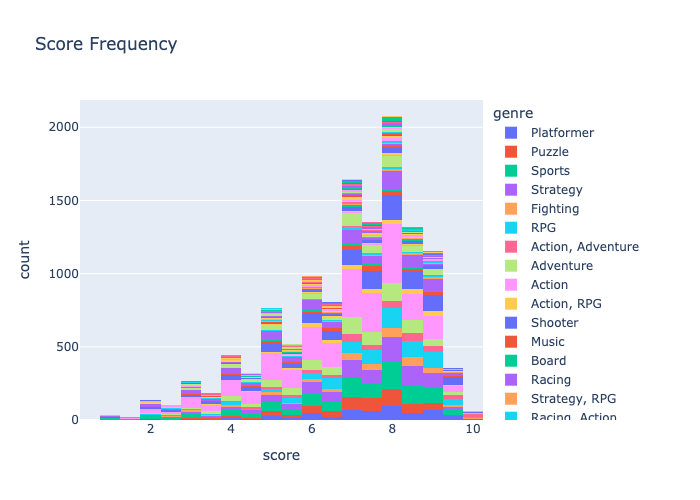

In [454]:
fig = px.histogram(df, x="score", title="Score Frequency", color="genre", nbins=20)
fig.show(renderer="png")

Wow yeah, that ton of different genres really doesn't make this histogram look that beautiful anymore. Maybe I'll pick a few to look at later.

But looking at the histogram as a whole, we can still recognize some interesting things. For example, we see lots of dents in the count of ratings, mainly in between integers, such as between 7 and 8, 6 and 7, and so on. This is probably because most ratings listed on IGN are in integers instead of decimal values.

Another thing is that the rating distribution seems to be skewed left, meaning that most of the ratings are on the higher portion of the spectrum. We actually have witnessed this earlier when we say that the 25% percentile score was 6.

Now lets start separating the genres.

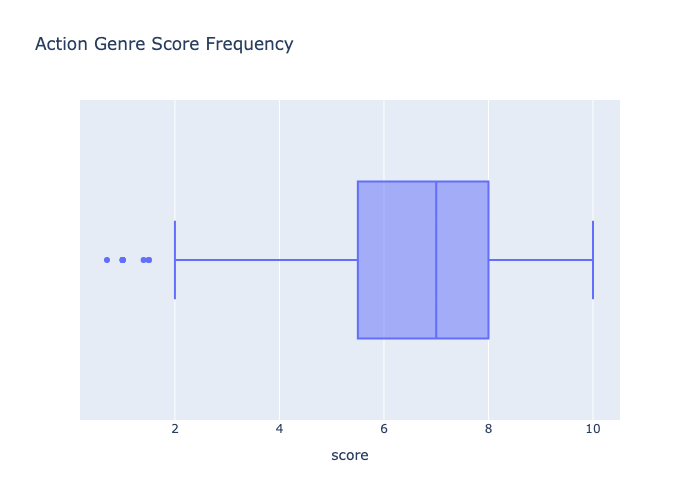

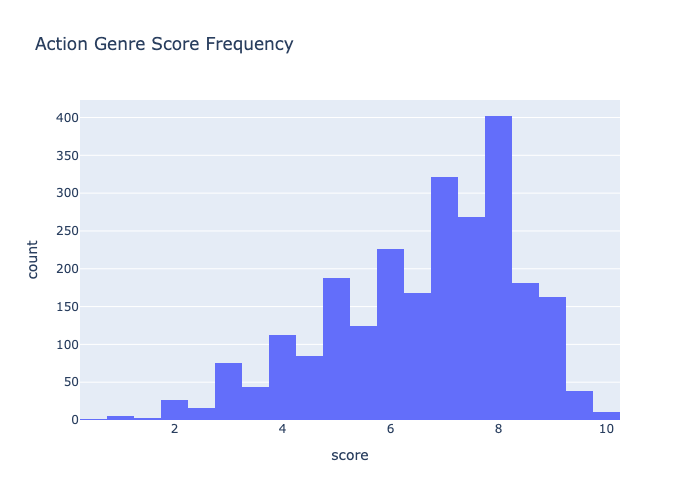

In [455]:
# let's start off with action since its the most populated genre
df_action = df[df["genre"] == "Action"]
fig2 = px.box(df_action, x="score", title="Action Genre Score Frequency")
fig2.show(renderer="png")
fig7 = px.histogram(df_action, x="score", title="Action Genre Score Frequency", nbins=20)
fig7.show(renderer="png")

In [456]:
df_action.describe()

score                   release_date
count  2458.000000                           2458
mean      6.638771  2006-04-09 16:33:00.146460672
min       0.700000            1996-11-02 00:00:00
25%       5.500000            2001-12-14 00:00:00
50%       7.000000            2006-11-15 00:00:00
75%       8.000000            2009-11-11 18:00:00
max      10.000000            2016-09-13 00:00:00
std       1.730475                            NaN

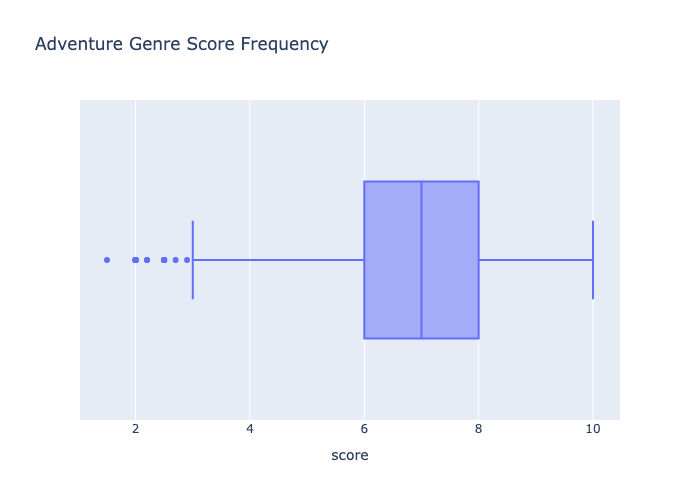

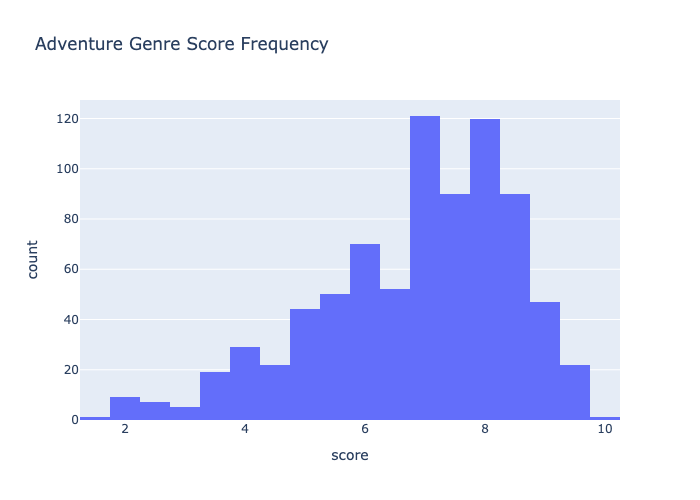

In [457]:
df_adventure = df[df["genre"] == "Adventure"]
fig3 = px.box(df_adventure, x="score", title="Adventure Genre Score Frequency")
fig3.show(renderer="png")
fig8 = px.histogram(df_adventure, x="score", title="Adventure Genre Score Frequency", nbins=20)
fig8.show(renderer="png")

In [458]:
df_adventure.describe()

score                   release_date
count  799.000000                            799
mean     6.845557  2008-05-01 09:45:43.929912576
min      1.500000            1970-01-01 00:00:00
25%      6.000000            2005-05-12 00:00:00
50%      7.000000            2008-11-19 00:00:00
75%      8.000000            2011-11-17 12:00:00
max     10.000000            2016-09-22 00:00:00
std      1.631090                            NaN

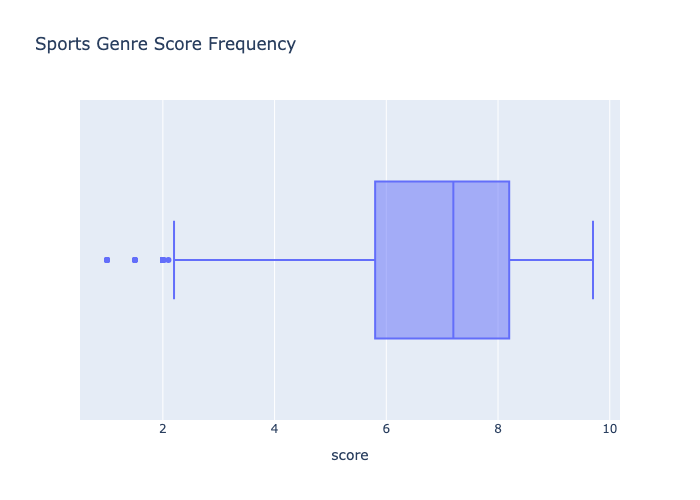

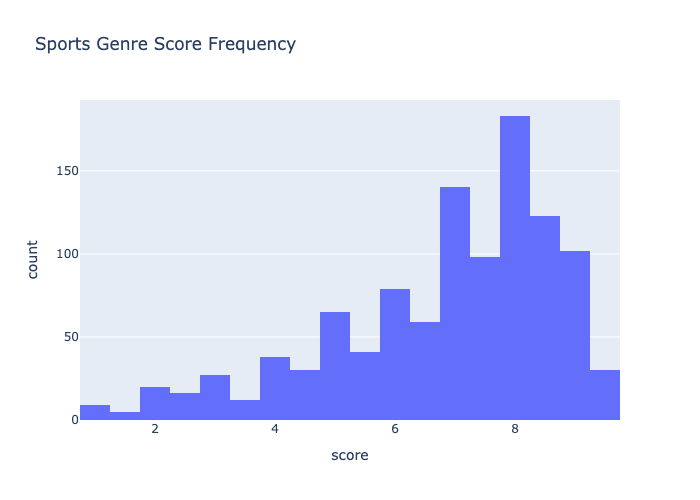

In [459]:
df_sports = df[df["genre"] == "Sports"]
fig4 = px.box(df_sports, x="score", title="Sports Genre Score Frequency")
fig4.show(renderer="png")
fig9 = px.histogram(df_sports, x="score", title="Sports Genre Score Frequency", nbins=20)
fig9.show(renderer="png")

In [460]:
df_sports.describe()

score                   release_date
count  1077.000000                           1077
mean      6.808728  2004-12-10 07:41:16.880222720
min       1.000000            1996-11-21 00:00:00
25%       5.800000            2000-10-23 00:00:00
50%       7.200000            2004-10-07 00:00:00
75%       8.200000            2008-08-27 00:00:00
max       9.700000            2016-09-22 00:00:00
std       1.898331                            NaN

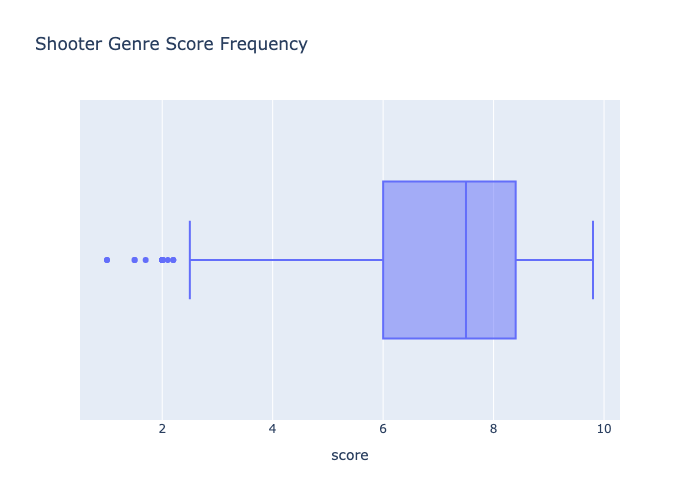

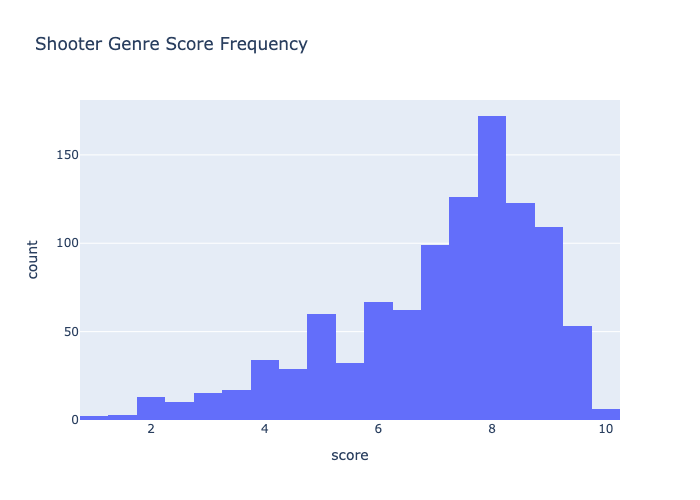

In [461]:
df_shooter = df[df["genre"] == "Shooter"]
fig5 = px.box(df_shooter, x="score", title="Shooter Genre Score Frequency")
fig5.show(renderer="png")
fig10 = px.histogram(df_shooter, x="score", title="Shooter Genre Score Frequency", nbins=20)
fig10.show(renderer="png")

In [462]:
df_shooter.describe()

score                   release_date
count  1032.000000                           1032
mean      7.078004  2007-10-17 14:04:11.162790656
min       1.000000            1996-11-21 00:00:00
25%       6.000000            2004-09-26 06:00:00
50%       7.500000            2008-02-25 12:00:00
75%       8.400000            2010-10-22 18:00:00
max       9.800000            2016-09-14 00:00:00
std       1.784601                            NaN

Out of these few genres I've taken a look at, it seems like the shooter genre has the highest mean score. This is quite interesting, maybe overall shooter games have a higher quality, or maybe IGN commenters have a higher preference for shooter games?

Shooter games also seem to have this very clear "peak" at the 8 rating position, this is quite interesting as the other genres don't really have such a clear peak.

Before ending I want to try one more thing...

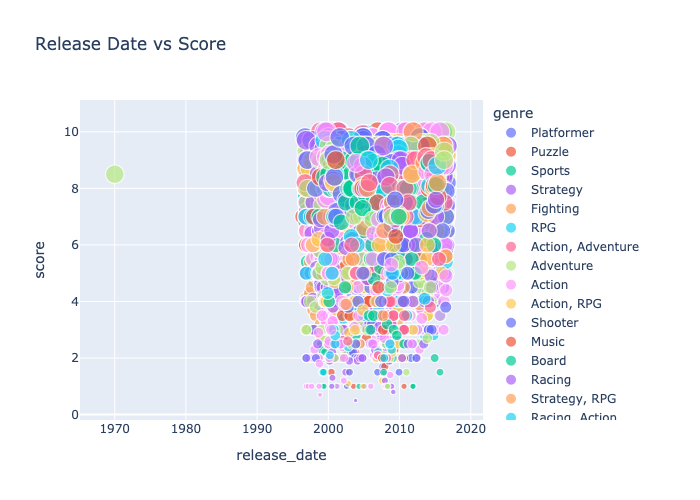

In [463]:
fig6 = px.scatter(df, x="release_date", y="score", title="Release Date vs Score", color="genre", size="score", hover_data=["title"])
fig6.show(renderer="png")

Okay... that didn't work so well... I tried adding a slider animation but I realized there wasn't anything else to add as a slider so... nevermind then

## Question 7

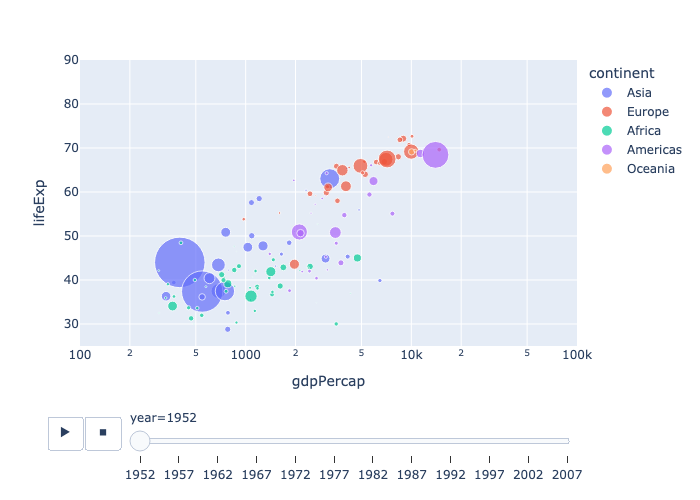

In [464]:

import plotly.express as px
df = px.data.gapminder()
fig1 = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig1.show(renderer="png")

## Question 8

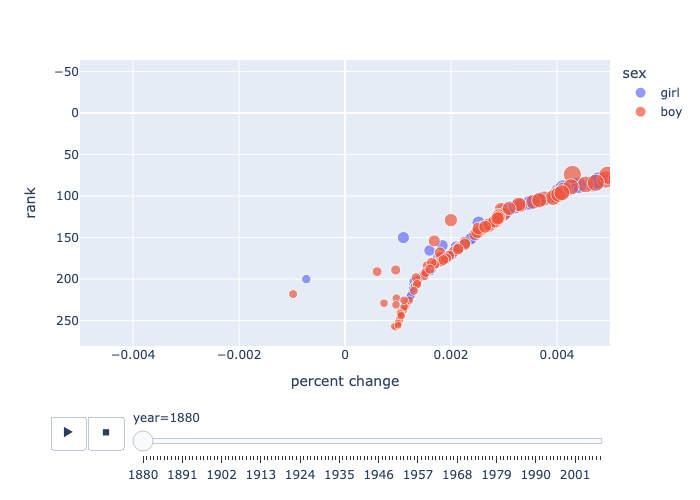

In [465]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Question 9


Yes